In [18]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
import operator
from sklearn import cluster
import matplotlib.pyplot as plt
import math
from wordcloud import WordCloud

In [3]:
df = pd.read_csv('news_headlines.csv')
uw_df = pd.read_csv('useless_words.csv')

In [4]:
def represents_number(s):
    for c in '0123456789':
        if s[0] == c:
            return True
    return False
    '''try:
        float(s)
        return True
    except ValueError:
        return False'''

def convert_word(s):
    # take out useless characters
    s = s.translate({ord(c): None for c in '!@#:;\'\"*)([]{}%.,&'})
    # plural
    if len(s) > 0 and s[len(s)-1] == 's':
        s = s[:-1]
    return s

In [5]:
useless_words = set(uw_df.useless_words.values.tolist())

headlines = []

bag_of_words = {}
for i, headline in enumerate(df.headline_text):
    if i%(len(df.headline_text)//10) == 0:
        print(i,end=' ')
    if len(headlines)==0 or len(headlines[-1])!=0:
        headlines.append([])
    for word in headline.split(' '):
        word = convert_word(word)
        if (len(word) == 0):
            continue
        # useless words
        if (word in useless_words):
            continue
        # money
        if (word[0] == '$'):
            continue
        # number
        if (represents_number(word)):
            continue
        
        if (word in bag_of_words):
            bag_of_words[word] += 1
        else:
            bag_of_words[word] = 1
            
        if (word not in headlines[-1]):
            headlines[-1].append(word)
        #print(headlines)


0 100000 200000 300000 400000 500000 600000 700000 800000 900000 1000000 

In [6]:
print(len(bag_of_words))

63878


In [7]:
sorted_dict = sorted(bag_of_words.items(), key=operator.itemgetter(1))[-2000:]
print(sorted_dict)

[('bathurst', 513), ('label', 514), ('awb', 514), ('drag', 514), ('stadium', 514), ('drowning', 514), ('nod', 514), ('mean', 515), ('reflect', 515), ('email', 515), ('windie', 516), ('murdered', 516), ('targeted', 516), ('motorcyclist', 516), ('reduction', 517), ('reward', 517), ('freed', 517), ('fc', 517), ('locust', 517), ('protea', 518), ('digger', 518), ('performance', 518), ('breast', 518), ('advance', 519), ('image', 519), ('cycling', 519), ('husband', 519), ('plunge', 520), ('sunday', 520), ('inside', 520), ('inflation', 520), ('nasa', 521), ('taylor', 521), ('cancel', 521), ('crocodile', 521), ('discovery', 522), ('henry', 522), ('guantanamo', 522), ('gunman', 522), ('ian', 522), ('sister', 524), ('model', 524), ('so', 524), ('broadband', 524), ('since', 525), ('embassy', 525), ('pursuit', 525), ('electricity', 525), ('palm', 525), ('pet', 525), ('smoke', 525), ('illawarra', 526), ('gst', 526), ('application', 527), ('brain', 527), ('combat', 527), ('pain', 527), ('mike', 527),

In [8]:
indexes = {sorted_dict[i][0]:i for i in range(0,len(sorted_dict))}
matrix = np.zeros((len(df.headline_text),len(indexes)),dtype=np.uint8)

for i in range(0,len(headlines)):
    for word in (j for j in headlines[i] if j in indexes):
        matrix[i,indexes[word]] = 1 if word in indexes else 0

In [13]:
np.random.shuffle(matrix)
matrix = matrix[:10000,:]

labels = list(range(2,50))
inertias = []

for i in labels:
    print(i)
    kmeans = cluster.KMeans(i,verbose = 0)
    kmeans.fit(matrix)
    inertias.append(kmeans.inertia_)


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


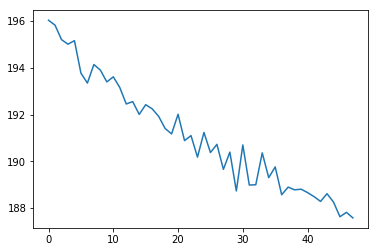

In [14]:
plt.plot(list(range(len(inertias))), [math.sqrt(i) for i in inertias])
plt.show()

In [15]:
kmeans = cluster.KMeans(25,verbose = 0)
kmeans.fit(matrix)
print(kmeans.labels_)

[9 1 7 ... 1 7 1]


In [46]:
print(kmeans.cluster_centers_.shape)
wordclouds = []
for cluster in kmeans.cluster_centers_:
    words = ""
    for i in range(len(cluster)):
        words += (sorted_dict[i][0] + ' ') * int(cluster[i]*100)
    print(words)
    wordclouds.append(WordCloud(max_font_size=50).generate(words))

(25, 2000)
bounce bounce bounce spotlight senior buy donald far gay resource crowd crackdown crackdown bendigo protection term best come qanta qanta st prompt track track trump hi right scheme challenge red red tiger premier premier look look housing station drought security mining land push push push chief chief local warning mayor jail review force share share industry industry industry pay work work fight fight fight top indigenou indigenou union union union centre funding pm pm law green power power cup worker minister minister minister minister minister job i cut cut change hit hit hit hit hit down down health off off sydney get water back back back back back back back back back back back back back back back back back back back back back back back back back back back back back back back back back back back back back back back back back back back back back back back back back back back back back back back back back back back back back back back back back back back back back back ba

blitz bust witnesse witnesse seize cannabi bashing chase drink raid raid raid tourist truck hunt hunt hunt hunt investigation stabbing number use arrest arrest arrest release crime officer officer officer investigate investigate investigate investigate plead alleged alleged body body shooting shooting spark station run fatal fatal chief warn assault assault teen teen appeal inquiry find search search search pay victim victim seek seek seek union probe probe probe probe nt case driver driver driver driver under missing missing missing missing road found minister accused killed drug drug drug woman charge murder murder murder car car claim hit attack attack sydney sydney crash nsw death death wa more fire court man man man man man man new new police police police police police police police police police police police police police police police police police police police police police police police police police police police police police police police police police police police poli

stadium stadium tenni guide shield seal martin raider medal upset upset prize prize cap rare bronco bulldog zealand zealand late chance eagle serie serie lanka stage film order grand wall fiji sri honour alice celebrate celebrate third smith double obama poll poll post olympic who grower right title title title title award award black team team tiger afl england play tour second run women women women women go big big appeal appeal appeal leader aussie aussie adelaide adelaide support top top top gold gold gold pm lead child melbourne labor labor green final final cup cup cup cup first first two election election set world world world charge claim claim against against off sydney sydney get qld australian australian australia australia australia australia australia australia win win win win win win win win win win win win win win win win win win win win win win win win win win win win win win win win win win win win win win win win win win win win win win win win win win win win win win

collision wave follow missile thailand van score senator palestinian israeli sheep philippine collapse afghanistan wine drive afghan afghan afghan indian firm dairy named truck defence girl troop five five five five five chinese soldier soldier soldier bomb despite accident accident accident blast blast blast officer risk violence violence break pakistan shooting four un bank bank second war close head begin sale strike three family perth share share share share share move could west west iraq iraq iraq support top flood lead lead driver trial first urged two two two two killed killed killed killed killed killed killed killed killed killed killed killed killed killed killed killed killed killed killed killed killed killed killed killed killed killed killed killed killed killed killed killed killed killed killed killed killed killed killed killed killed killed killed killed south die open open open open open world woman charge market market market murder car car car day charged attack a

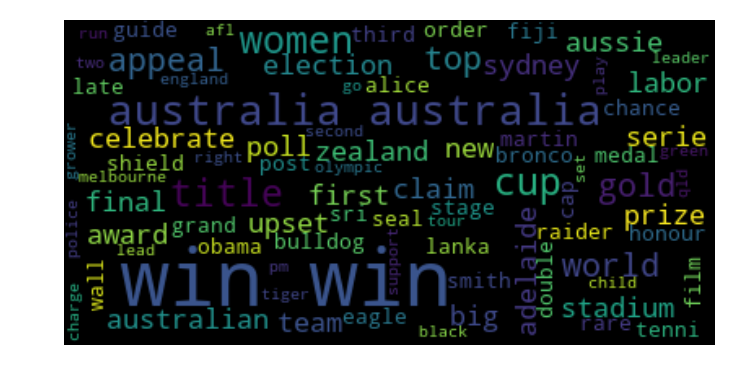

In [48]:
plt.figure(dpi=140)
plt.imshow(wordclouds[13], interpolation="bilinear")
plt.axis("off")
plt.show()